<a href="https://colab.research.google.com/github/prahladprajapat2601-oss/Credit_Card_fraud_detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import  TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.patches as mpatches


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold


In [10]:
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('creditcard.csv')

In [11]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [12]:

df.shape

(17918, 31)

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,...,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000
mean,13905.276259,-0.244970,0.258166,0.777804,0.291614,-0.146329,0.099878,-0.150970,0.012969,0.734707,...,-0.052197,-0.146256,-0.038504,0.014510,0.119974,0.036454,0.014558,0.007047,67.504000,0.004521
std,9867.916251,1.893161,1.508296,1.766872,1.479519,1.423917,1.327756,1.342027,1.318460,1.273597,...,0.826158,0.634077,0.526168,0.588938,0.438850,0.537046,0.397673,0.248679,189.184677,0.067087
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.687773,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3781.250000,-0.959806,-0.305367,0.338327,-0.629972,-0.729796,-0.651820,-0.599770,-0.175261,-0.102798,...,-0.262581,-0.556175,-0.173509,-0.330602,-0.140146,-0.345451,-0.071486,-0.011786,5.490000,0.000000
50%,12347.500000,-0.306803,0.235061,0.924255,0.230058,-0.192681,-0.169764,-0.076457,0.020846,0.726588,...,-0.119493,-0.118803,-0.046656,0.063623,0.158356,-0.030200,0.003094,0.018529,15.950000,0.000000
75%,23775.000000,1.164015,0.876538,1.557391,1.155770,0.347812,0.493661,0.447398,0.272076,1.480254,...,0.041561,0.250886,0.072758,0.398391,0.397765,0.342446,0.098968,0.077345,56.670000,0.000000
max,29031.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [14]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,1
V6,1
V7,1
V8,1
V9,1


In [15]:
df = df.dropna()


In [16]:
df.isnull().sum().max()


0

In [17]:
df.shape

(17917, 31)

In [18]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [19]:
print('No Frauds',round(df['Class'].value_counts()[0]/len(df)*100,2),'% of the dataset')
print('Frauds',round(df['Class'].value_counts()[1]/len(df)*100,2),'% of the dataset')

No Frauds 99.55 % of the dataset
Frauds 0.45 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

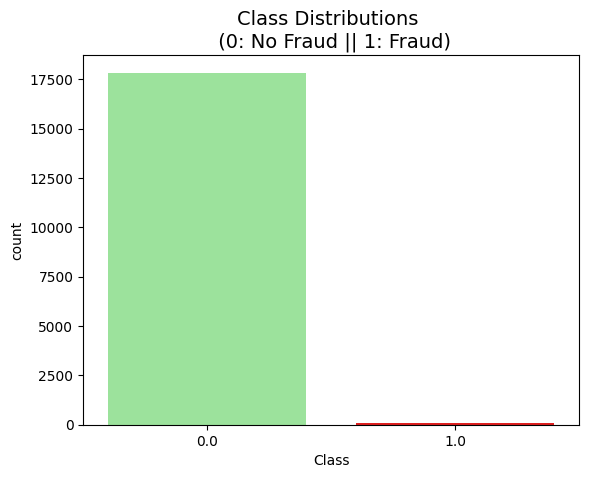

In [20]:
colors = ["#90EE90", "#FF0000"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)


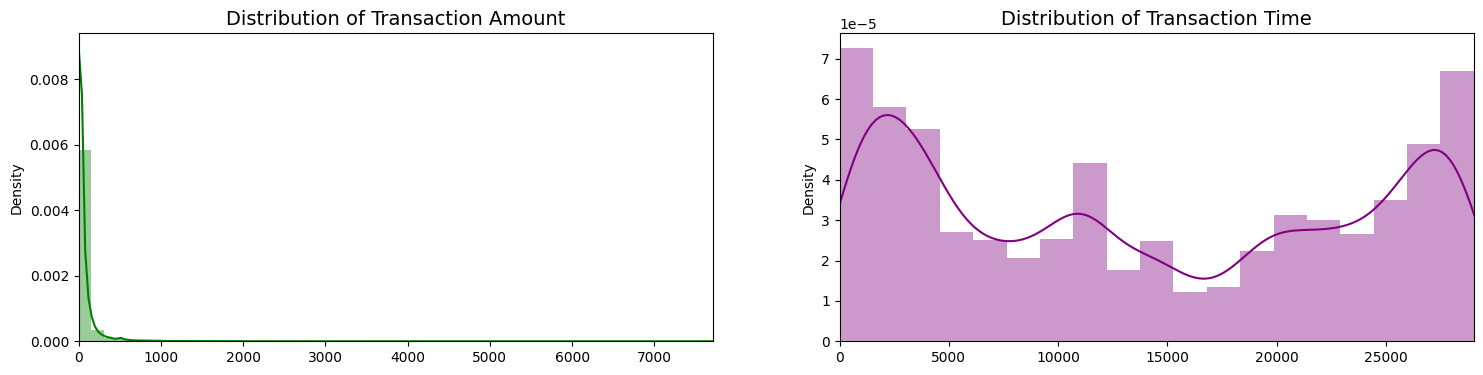

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='purple')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler, RobustScaler
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [25]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.611762,-0.617578,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.259086,-0.617578,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,7.086948,-0.617528,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,2.101407,-0.617528,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,1.055881,-0.617478,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0
